In [86]:
#!pip install fuzzy-c-means
#!pip install -U scikit-learn

In [87]:
import numpy as np
import pandas as pd 
from fcmeans import FCM
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [88]:
dataset = pd.read_csv("https://waf.cs.illinois.edu/discovery/congress.csv")
dataset

,name,party,state,vote1,vote2,vote3,vote4,vote5,vote6,vote7,vote8,vote9,vote10,vote11,vote12,vote13,vote14,vote15
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Warner,D,VA,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
96,Warren,D,MA,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
97,Whitehouse,D,RI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [89]:
from sklearn.decomposition import PCA
trainset = dataset[ ["vote1", "vote2", "vote3", "vote4", "vote5", "vote6", "vote7", "vote8", "vote9", "vote10", "vote11", "vote12", "vote13", "vote14", "vote15"] ]
pca = PCA(n_components=2)
trainset = pca.fit_transform(trainset)
labels = dataset["party"]
labels = labels.replace("D", 1)
labels = labels.replace("R", 0)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(trainset, labels, test_size=0.3, random_state=42)

In [91]:
cmodel = FCM(n_clusters=2)
cmodel.fit(np.asarray(X_train))

In [92]:
#fcm_centers = cmodel.centers
y_pred = np.array(cmodel.predict(np.asarray(X_test)))
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [93]:
count = 0
y_test = list(y_test)
y_pred = list(y_pred)
for i in range(len(y_test)):
  if y_test[i] == y_pred[i]:
    count += 1
acc = (count/len(y_test))*100
acc



96.66666666666667

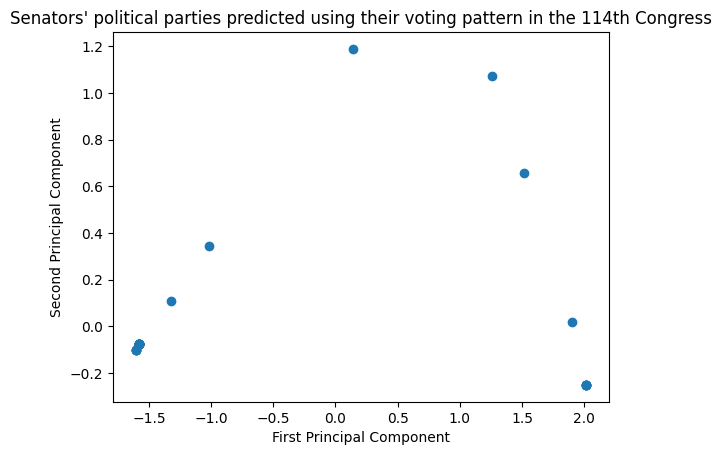

In [100]:
color_arr_sm = np.random.rand(26)
plt.title('Senators\' political parties predicted using their voting pattern in the 114th Congress')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.scatter(X_test[:, 0], X_test[:, 1])

In [95]:
from sklearn.cluster import KMeans
kmodel = KMeans(n_clusters=2)
kmodel.fit(np.asarray(X_train))

KMeans(n_clusters=2)

In [96]:
y_pred_kmodel = np.array(kmodel.predict(np.asarray(X_test)))

In [97]:
count = 0
y_test = list(y_test)
y_pred_kmodel = list(y_pred_kmodel)
for i in range(len(y_test)):
  if y_test[i] == y_pred_kmodel[i]:
    count += 1
acc = (count/len(y_test))*100
acc


96.66666666666667

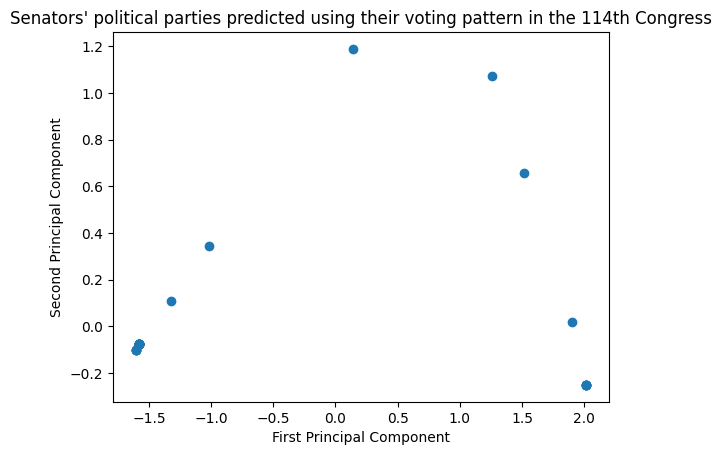

In [106]:
color_arr_sm = np.random.rand(26)
plt.title('Senators\' political parties predicted using their voting pattern in the 114th Congress')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.scatter(X_test[:, 0], X_test[:, 1])

In [103]:
X_test[:, 0]

array([-1.57876445, -1.60708758, -1.57876445, -1.57876445,  2.01879354,
       -1.57876445, -1.57876445, -1.60708758,  2.01879354, -1.01404771,
       -1.57876445, -1.57876445,  2.01879354, -1.57876445, -1.57876445,
        1.26163015, -1.57876445, -1.57876445,  2.01879354, -1.57876445,
       -1.32320836, -1.57876445, -1.60708758,  0.13957598, -1.60708758,
        1.51985015, -1.57876445,  2.01879354,  1.90485799, -1.57876445])